<a href="https://www.kaggle.com/code/nooralrajab/car-t-cell-therapy-target-assessment-ipynb?scriptVersionId=192683056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Preparations 

In [1]:
input_directory="/kaggle/input"
output_directory="/kaggle/working"

In [2]:
!pip install scanpy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=28e354bad04e8d33f05377cacd9d10c8eaf2096cf712ba95853c29c722b17594
  Stored in directory: /root/.cache/pip/wheels/e6/3e/d2/2325892469be5cc93dbc1dbe101d0fc48b4765adfb1973b583
Successfully built session-info


In [3]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.8 MB/s eta 0:00:0000:0100:01


In [4]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 20.6 MB/s eta 0:00:0000:0100:01


In [5]:
!pip install protpy
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 678.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.7/373.7 kB 3.1 MB/s eta 0:00:0000:0100:01


In [6]:
!pip install --user magic-impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 955.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.6 MB/s eta 0:00:00a 0:00:01


# Choose one subdataset

In [7]:
import pandas as pd
import scanpy as sc
import os

# dataset variable is string before the word "matrix" or "barcodes" or "features"in dataset
# will be used to find the files as well as some output file names
dataset="GSM8207629_pat3_pre"

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if dataset.split("_")[0] in os.path.join(dirname, filename):
            print(os.path.join(dirname, filename))

fn = '/kaggle/input/gse263932/'+dataset+'_barcodes.tsv/barcodes.tsv'
obs = pd.read_csv(fn, sep = '\t', index_col = 0, header = None)
obs.index.name = 'Barcode'
display(obs)

fn = '/kaggle/input/gse263932/'+dataset+'_features.tsv/features.tsv'
var = pd.read_csv(fn, sep = '\t', header = None, names=['Gene EnsemblID','Gene Symbol','Description'])

var = var.reset_index()
var = var.set_index('Gene Symbol' )
var.drop(var.columns[0], axis=1,inplace=True)
display(var)

# Load the .mtx file using Scanpy's read_mtx function
adata = sc.read_mtx(input_directory+"/gse263932/"+dataset+"_matrix.mtx/matrix.mtx")
adata = adata.T

# Assign the row and column index to the AnnData object
adata.var = var
adata.obs = obs
isLogged=False # flag to prevent applying log scale twice
adata


/kaggle/input/gse263932/GSM8207629_pat3_pre_barcodes.tsv/barcodes.tsv
/kaggle/input/gse263932/GSM8207629_pat3_post_samples.csv/GSM8207629_pat3_post_samples.csv
/kaggle/input/gse263932/GSM8207629_pat3_pre_matrix.mtx/matrix.mtx
/kaggle/input/gse263932/GSM8207629_pat3_pre_features.tsv/features.tsv


""
Barcode
AAACCTGAGCGTTGCC-1
AAACCTGAGCTAACAA-1
AAACCTGAGTCAATAG-1
AAACCTGAGTTTAGGA-1
AAACCTGCACGGTGTC-1
...
TTTGTCACATCGTCGG-1
TTTGTCAGTGTGCCTG-1
TTTGTCATCTGATTCT-1


,Gene EnsemblID,Description
Gene Symbol,,
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC141272.1,ENSG00000277836,Gene Expression
AC023491.2,ENSG00000278633,Gene Expression
AC007325.1,ENSG00000276017,Gene Expression


AnnData object with n_obs × n_vars = 4266 × 36601
    var: 'Gene EnsemblID', 'Description'

# Preprocessing

... storing 'Description' as categorical


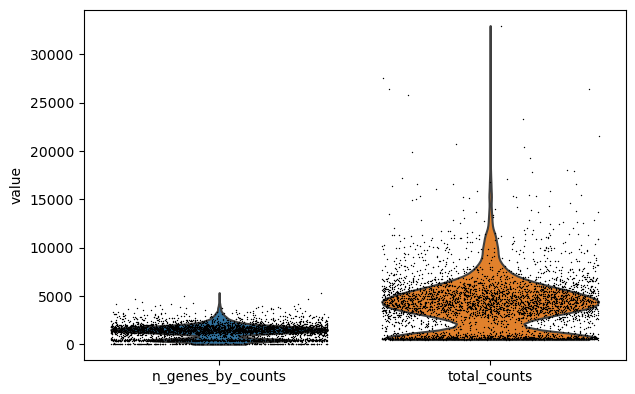

In [8]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.var_names_make_unique()
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4)

In [9]:
import scanpy.external as sce

# Filtering
sc.pp.filter_cells(data=adata, min_counts=3, inplace=True)
sc.pp.filter_cells(data=adata, min_genes=200, inplace=True)
sc.pp.filter_cells(data=adata, max_genes=2500, inplace=True)

if(isLogged==True):
    print("Data is already logged. Did not perform scaling and transformation again.")
        
else:
    sc.pp.normalize_total(adata, target_sum=1e4)

    adata.layers["counts"]=adata.X.copy() # saving a layer of pure counts before log1p transform

    sc.pp.log1p(adata)
    sce.pp.magic(adata, name_list='all_genes', knn=5)
    #
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    display(adata.to_df().describe())
    isLogged=True # update flag

/root/.local/lib/python3.7/site-packages/magic/magic.py:426: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


  Running MAGIC with `solver='exact'` on 36601-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/root/.local/lib/python3.7/site-packages/magic/utils.py:145: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(data)


Gene Symbol,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
count,3824.0,3824.0,3824.0,3824.000000,3824.0,3824.0,3824.000000,3824.0,3824.0,3824.0,...,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0
mean,0.0,0.0,0.0,0.002093,0.0,0.0,0.006663,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.002841,0.0,0.0,0.005772,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.000122,0.0,0.0,0.003494,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.001330,0.0,0.0,0.005087,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.002895,0.0,0.0,0.008014,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.059269,0.0,0.0,0.084398,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


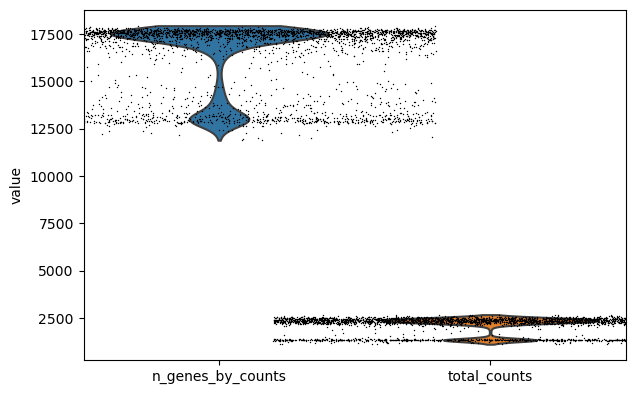

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.8)

# Labeling cell types with CellTypist

In [11]:
import celltypist
model = celltypist.models.Model.load(model = 'Healthy_COVID19_PBMC.pkl')
predictions=celltypist.annotate(adata, model=model, majority_voting=True)
adata.obs["cell_type"]=predictions.predicted_labels["majority_voting"]


# Clustering

In [12]:
sc.pp.highly_variable_genes(adata)
adata.var[adata.var.highly_variable]
adata.var

,Gene EnsemblID,Description,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
Gene Symbol,,,,,,,,,,,,
MIR1302-2HG,ENSG00000243485,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.00000
FAM138A,ENSG00000237613,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.00000
OR4F5,ENSG00000186092,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.00000
AL627309.1,ENSG00000238009,Gene Expression,2939,0.002093,0.002091,23.143305,8.003901,2.197658,False,2.097125e-03,-5.542902,-1.19448
AL627309.3,ENSG00000239945,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.00000
AC023491.2,ENSG00000278633,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.00000
AC007325.1,ENSG00000276017,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.00000


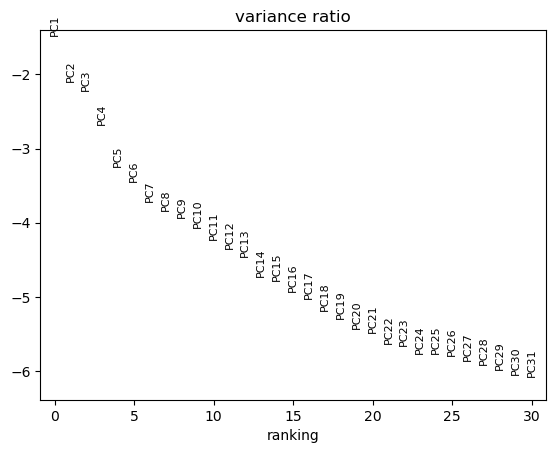

In [13]:
adata.raw=adata
adata=adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata,max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata,log=True)

Compare unsupervised clustering to cell type predictions by CellTypist.

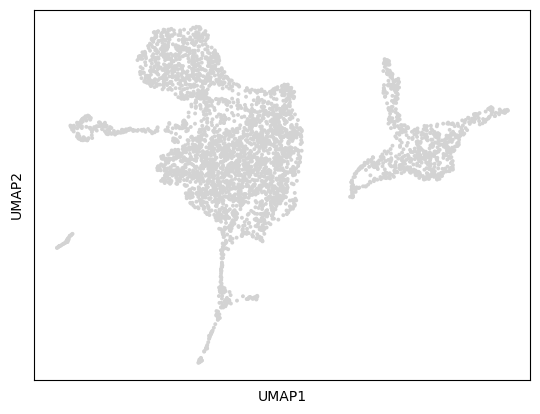

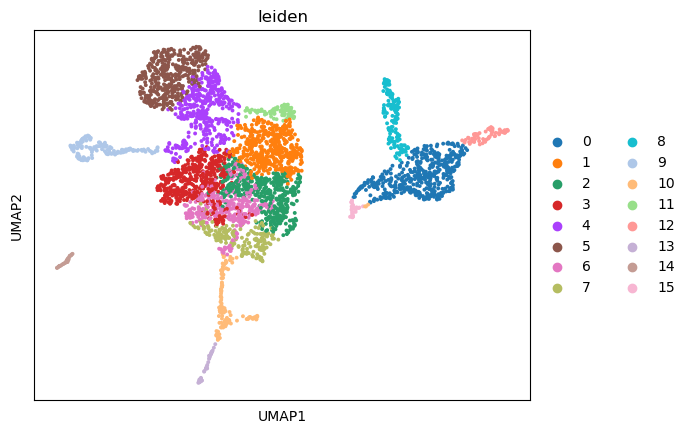

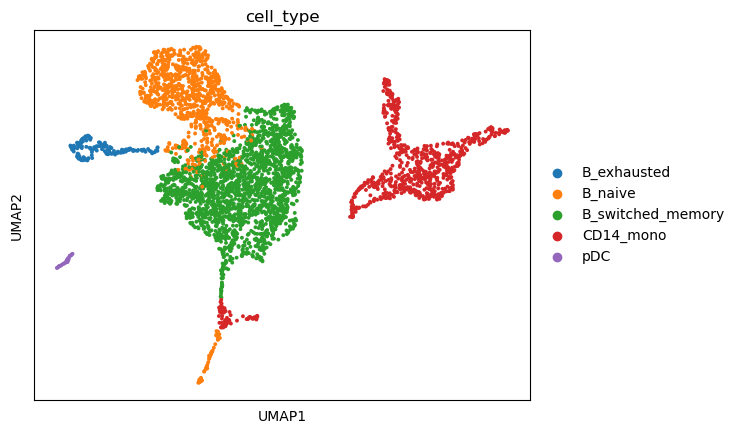

In [14]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=12)
sc.tl.umap(adata)
sc.pl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['leiden'])
sc.pl.umap(adata, color=['cell_type'])

Uncomment this line to override CellTypist labels with unsupervised clustering labels

In [15]:
'''adata.obs["cell_type"]=adata.obs["leiden"]'''

'adata.obs["cell_type"]=adata.obs["leiden"]'

# Gene rankings per cell type

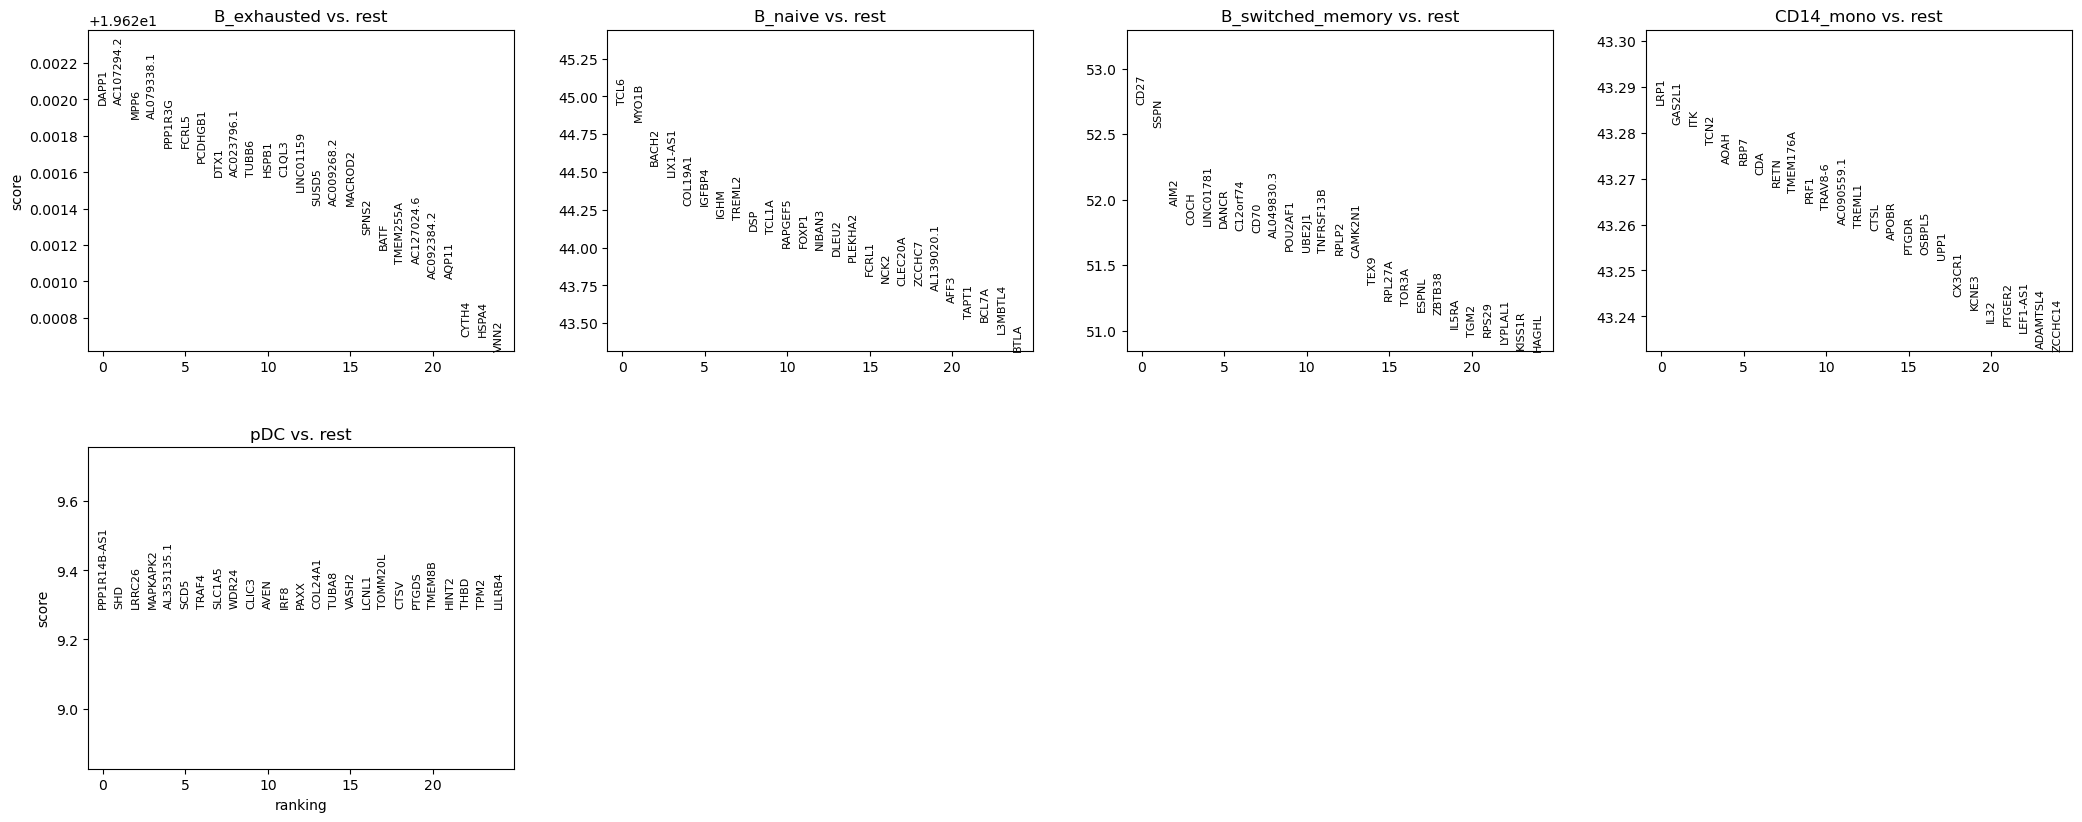

In [16]:
sc.tl.rank_genes_groups(adata, 'cell_type', method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

# Define a list of proteins that are considered surface markers
We defined a surface marker as any protein that belongs to any of the following classes on Human Protein Atlas:
- Plasma proteins
- Predicted membrane proteins
- CD markers

In [17]:
import pandas as pd

HPA_genes=pd.read_csv(input_directory+"/hpa-gene-synonyms-and-protein-classes/HPA_Protein_Classes.tsv", sep='\t')
display(HPA_genes)
classes=HPA_genes["Protein class"].values
gene_names=HPA_genes["Gene"].values
surf_markers=[]
for idx in HPA_genes.index:
    if('Plasma proteins' in classes[idx] or 'Predicted membrane proteins' in classes[idx] or 'CD markers' in classes[idx]):
        surf_markers.append(gene_names[idx])
surf_markers.pop(surf_markers.index("SELENOI")) # This gene causes problems when fetching descriptors
surf_markers.pop(surf_markers.index("SELENOK")) # This gene causes problems when fetching descriptors
surf_markers.pop(surf_markers.index("SELENOS")) # This gene causes problems when fetching descriptors
surf_markers=list(set(surf_markers)) # unique values only
print(surf_markers)

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Pathology prognostics - Lung cancer,Pathology prognostics - Melanoma,Pathology prognostics - Ovarian cancer,Pathology prognostics - Pancreatic cancer,Pathology prognostics - Prostate cancer,Pathology prognostics - Renal cancer,Pathology prognostics - Stomach cancer,Pathology prognostics - Testis cancer,Pathology prognostics - Thyroid cancer,Pathology prognostics - Urothelial cancer
0,A1BG,NaN,ENSG00000121410,Alpha-1-B glycoprotein,P04217,19,58345178-58353492,"Plasma proteins, Predicted intracellular prote...",NaN,NaN,...,unprognostic (1.09e-1),unprognostic (2.59e-1),unprognostic (2.10e-1),unprognostic (1.47e-2),unprognostic (1.37e-2),unprognostic (4.19e-5),unprognostic (2.37e-2),unprognostic (1.94e-1),unprognostic (1.72e-1),unprognostic (6.72e-2)
1,A1CF,"ACF, ACF64, ACF65, APOBEC1CF, ASP",ENSG00000148584,APOBEC1 complementation factor,Q9NQ94,10,50799409-50885675,Predicted intracellular proteins,mRNA processing,RNA-binding,...,unprognostic (7.38e-3),NaN,unprognostic (1.30e-2),unprognostic (2.46e-2),unprognostic (1.20e-1),unprognostic (1.90e-3),unprognostic (1.97e-2),unprognostic (2.77e-1),unprognostic (2.19e-2),unprognostic (8.50e-4)
2,A2M,"CPAMD5, FWP007, S863-7",ENSG00000175899,Alpha-2-macroglobulin,P01023,12,9067664-9116229,"Cancer-related genes, Candidate cardiovascular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,unprognostic (3.65e-2),unprognostic (2.38e-1),unprognostic (7.19e-2),unprognostic (4.71e-2),unprognostic (2.06e-2),unprognostic (1.28e-2),unprognostic (8.04e-3),unprognostic (2.32e-2),unprognostic (8.58e-2),unprognostic (9.03e-3)
3,A2ML1,"CPAMD9, FLJ25179, p170",ENSG00000166535,Alpha-2-macroglobulin like 1,A8K2U0,12,8822621-8887001,"Disease related genes, Predicted intracellular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,unprognostic (7.58e-3),unprognostic (2.63e-1),unprognostic (1.57e-1),unprognostic (1.15e-3),unprognostic (2.03e-1),unprognostic (1.06e-9),unprognostic (2.28e-1),unprognostic (3.07e-1),unprognostic (5.88e-2),unprognostic (2.42e-2)
4,A3GALT2,"A3GALT2P, IGB3S, IGBS3S",ENSG00000184389,"Alpha 1,3-galactosyltransferase 2",U3KPV4,1,33306766-33321098,"Enzymes, Predicted membrane proteins",Lipid metabolism,"Glycosyltransferase, Transferase",...,unprognostic (4.96e-2),unprognostic (6.83e-2),unprognostic (5.81e-2),unprognostic (1.23e-1),unprognostic (1.89e-1),unprognostic (4.90e-8),unprognostic (1.17e-1),NaN,unprognostic (1.12e-2),unprognostic (7.87e-2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20157,ZYG11A,ZYG11,ENSG00000203995,"Zyg-11 family member A, cell cycle regulator",Q6WRX3,1,52842511-52894998,Predicted intracellular proteins,Ubl conjugation pathway,NaN,...,unprognostic (2.34e-1),unprognostic (4.56e-2),unprognostic (2.06e-2),unprognostic (4.01e-2),unprognostic (1.01e-1),unprognostic (6.15e-3),unprognostic (2.95e-1),unprognostic (1.21e-1),unprognostic (3.07e-1),unprognostic (1.02e-1)
20158,ZYG11B,"FLJ13456, ZYG11",ENSG00000162378,"Zyg-11 family member B, cell cycle regulator",Q9C0D3,1,52726453-52827336,Predicted intracellular proteins,Ubl conjugation pathway,NaN,...,unprognostic (1.85e-1),unprognostic (4.84e-3),unprognostic (5.06e-2),unprognostic (2.76e-1),unprognostic (6.08e-2),prognostic favorable (9.80e-7),unprognostic (2.22e-1),unprognostic (3.37e-1),unprognostic (1.13e-1),unprognostic (9.57e-2)
20159,ZYX,NaN,ENSG00000159840,Zyxin,Q15942,7,143381295-143391111,"Plasma proteins, Predicted intracellular proteins","Cell adhesion, Host-virus interaction",NaN,...,unprognostic (1.66e-3),unprognostic (2.60e-1),unprognostic (4.22e-1),unprognostic (1.98e-1),unprognostic (2.43e-1),prognostic unfavorable (7.92e-5),unprognostic (1.39e-1),unprognostic (8.12e-2),unprognostic (1.95e-1),unprognostic (6.72e-2)
20160,ZZEF1,"FLJ10821, KIAA0399, ZZZ4",ENSG00000074755,Zinc finger ZZ-type and EF-hand domain contain...

['ENDOG', 'HECW2', 'MSH2', 'TMEM98', 'NF1', 'MPV17L2', 'PIGB', 'TMEM70', 'FAM241B', 'SLC38A1', 'CALHM6', 'OR2L3', 'SLC17A7', 'ENSG00000260272', 'RGL2', 'FNDC5', 'CHAF1B', 'CMA1', 'LMAN2L', 'OR2AJ1', 'CD300LB', 'PSMA2', 'AQP6', 'FAF1', 'OR4F15', 'MCF2', 'IGF2BP2', 'ERVV-2', 'SERPINA4', 'CYB5B', 'INSIG2', 'FCGR3A', 'SLC26A1', 'MIF', 'PPID', 'NDUFA4L2', 'CSDE1', 'TPM4', 'OR2F2', 'SLC6A4', 'RAB21', 'COL5A2', 'NR3C1', 'SLC31A2', 'SLC2A7', 'UBR3', 'URGCP', 'ATL3', 'USP30', 'GSTP1', 'OR4E1', 'TAS2R46', 'BRCA1', 'TRBC2', 'ID1', 'STAU1', 'GHRL', 'MEA1', 'SUSD4', 'OR51D1', 'ARHGEF1', 'OR5AL1', 'PABPN1', 'ENSG00000250644', 'OR4C3', 'OR2T11', 'YIPF2', 'FHOD1', 'OR4S1', 'UQCC3', 'FAH', 'ATOH1', 'TLCD4', 'MYH2', 'SCARF2', 'PMEL', 'LAIR2', 'ESCO1', 'NPIPA8', 'PCDHB13', 'TMEM45B', 'GYS1', 'TCF3', 'USP10', 'SCAMP4', 'FAM3A', 'OR1M1', 'SYNDIG1L', 'ARPC5', 'CSNK1D', 'C1orf43', 'MRPL49', 'KRT38', 'PLPPR1', 'TNFRSF10D', 'PCDHA3', 'SYT7', 'OR9Q1', 'SLC52A3', 'OR11H12', 'EXOSC4', 'OTULINL', 'TTC4', 'PTTG1IP2

# Defining disease-related genes
Combined genes associated with lupus reported by Cui et al. [1] and Wang et al. [2].

[1] Y. Cui et al., ‘Exploring the shared molecular mechanisms between systemic lupus erythematosus and primary Sjögren’s syndrome based on integrated bioinformatics and single-cell RNA-seq analysis’, Front Immunol, vol. 14, p. 1212330, 2023, doi: 10.3389/fimmu.2023.1212330.

[2] Y. Wang, Z. Huang, Y. Xiao, W. Wan, and X. Yang, ‘The shared biomarkers and pathways of systemic lupus erythematosus and metabolic syndrome analyzed by bioinformatics combining machine learning algorithm and single-cell sequencing analysis’, Front Immunol, vol. 13, p. 1015882, 2022, doi: 10.3389/fimmu.2022.1015882.


In [18]:
def intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

#https://pubmed.ncbi.nlm.nih.gov/37614232/
#upregProts_literature=['IFI44L', 'ISG15', 'ITGB2']

#https://pubmed.ncbi.nlm.nih.gov/36341378/
#upregProts_literature=['TNFSF13B', 'OAS1']

upregProts_literature=['TNFSF13B', 'OAS1', 'IFI44L', 'ISG15', 'ITGB2']

# Only keep disease-related genes that are present in the post-filtering adata object
upregProts=intersection(upregProts_literature, adata.var.index)

print("Disease related proteins considered:")
print(upregProts)

Disease related proteins considered:
['TNFSF13B', 'ITGB2', 'ISG15']


# Find descriptors of surface markers

Descriptors can only be calculated for FASTA sequences, therefore FASTA sequences are first fetched for each surface marker.

In [20]:
from Bio import SeqIO
import protpy as protpy
import numpy as np

def get_fasta(geneList):
    gene_to_seq = {}
    sequences=[]
    geneList=list(geneList)
    successfulGenes=[]

    for record in SeqIO.parse(input_directory+"/uniprot-swissprot-fasta/uniprot_sprot.fasta", "fasta"):
        org=record.name.split("|")[2].split("_")[1]
        try:
            gene=record.description.split("GN=")[1].split(" ")[0]
        except Exception as e:
            #print(e)
            pass
            gene=record.name.split("|")[2].split("_")[0]
        if(org == "HUMAN" and gene in geneList):
            gene_to_seq[gene]=record.seq
            #print(gene_to_seq)
    for gene in geneList:
        try:
            new_seq=gene_to_seq[gene]
            sequences.append(new_seq)
            successfulGenes.append(gene)
        except Exception as e:
            #print(e)
            pass
    return sequences, successfulGenes

prots=[g for g in surf_markers if g in list(adata.var_names)]
seqs, genes_found=get_fasta(prots) # use genes in common between surface markers and dataset
desc_lookup=pd.DataFrame({"Gene": genes_found, "FASTA": seqs})
descList=[]
for i, seq in enumerate(seqs):
    #try:
    descList.append(protpy.dipeptide_composition(str(seq)))
    #except:
        #print("Error with gene "+genes_found[i]+" sequence "+seq)
desc_lookup=desc_lookup.join(pd.DataFrame(np.squeeze(descList)))
desc_lookup.drop("FASTA", inplace=True, axis=1)
desc_lookup.set_index("Gene", inplace=True)

display(desc_lookup)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Gene,,,,,,,,,,,,,,,,,,,,,
MSH2,0.75,0.11,0.11,0.64,0.32,0.43,0.21,0.32,0.54,0.86,...,0.21,0.00,0.00,0.32,0.21,0.00,0.21,0.32,0.00,0.11
PIGB,0.00,0.00,0.36,0.00,0.36,0.00,0.00,0.00,0.00,1.08,...,0.00,0.18,0.54,0.00,0.18,0.90,0.36,0.18,0.18,0.36
SLC38A1,0.21,0.21,0.21,0.00,0.62,0.00,0.00,0.62,0.21,0.62,...,0.00,0.00,0.00,0.21,0.00,0.41,0.21,0.41,0.00,0.00
CALHM6,1.91,0.00,0.00,0.32,0.96,0.32,0.00,0.00,0.64,1.91,...,0.00,0.32,0.00,0.00,0.00,0.32,0.32,0.64,0.00,0.32
RGL2,0.39,0.00,0.64,0.52,0.26,0.39,0.00,0.13,0.13,0.90,...,0.00,0.13,0.00,0.00,0.13,0.13,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LHFPL2,0.00,0.00,0.44,1.32,1.32,1.32,0.00,1.32,0.00,0.44,...,0.00,0.00,0.44,0.00,0.00,0.00,0.44,0.00,0.00,0.00
VCPIP1,0.66,0.08,0.25,0.49,0.33,0.16,0.25,0.00,0.49,0.66,...,0.00,0.16,0.00,0.08,0.08,0.41,0.08,0.00,0.08,0.00
TNFRSF13C,0.55,0.55,0.00,1.09,0.00,2.19,0.00,0.00,0.00,2.73,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Predicting protein abundances

In [23]:
import pickle

model='ridge'

cellTypes = list(adata.obs['cell_type'].unique())

def get_abundances(transcripts_per_gene, model='ridge'): # takes a dataframe where indicies are gene names and one column (transcripts)
    X_desc=desc_lookup.copy()
    X_desc=X_desc.mul(transcripts_per_gene, axis=0)
    transcripts_per_gene=transcripts_per_gene.to_frame()
    X=transcripts_per_gene.join(X_desc, how='inner') # based on index
    if(model=='ridge'):
        model_file = open(input_directory+"/protein_abundance_predictor/scikitlearn/ridge/2/Ridge_Protein_Abundance_Predictor.sav",'rb') # Ridge
    else:
        model_file = open(input_directory+"/protein_abundance_predictor/scikitlearn/default/1/Protein_Abundance_Predictor.sav",'rb') # Random Forest
    model = pickle.load(model_file)
    model_file.close()
    y=model.predict(X)
    return y

cellMatrix = adata.to_df()
cellMatrix_surf = cellMatrix.loc[:, genes_found].copy() # only keep genes found in fasta and surf_markers
cellMatrix_surf['cell_type'] = adata.obs['cell_type']
cellMatrix['cell_type'] = adata.obs['cell_type']

medianList=[]
for cell_t in cellTypes:
    medianList.append(cellMatrix_surf.loc[cellMatrix_surf['cell_type']==cell_t].median()) # averaging uses conditional non zero median of cell counts
medianDf=pd.DataFrame(medianList, columns=cellMatrix_surf.columns, index=cellTypes)
medianDf=medianDf.clip(0)
medianDf.drop("cell_type", inplace=True, axis=1)
medianDf=medianDf.T

abundanceMatrix=[]

for cell_t in cellTypes:
    transcripts_col=medianDf[cell_t].rename("Transcripts")
    abund_row=get_abundances(transcripts_col, model)
    abundanceMatrix.append(abund_row)
    
abundanceMatrix=pd.DataFrame(abundanceMatrix, index=cellTypes, columns=genes_found)
abundanceMatrix.clip(0,inplace=True)
display(abundanceMatrix)

,MSH2,PIGB,SLC38A1,CALHM6,RGL2,FAF1,FCGR3A,RAB21,SLC31A2,UBR3,...,RO60,ALDH16A1,CTSC,UBE2G1,SYNGR1,LHFPL2,VCPIP1,TNFRSF13C,CD27,FER
B_naive,0.972149,1.086856,2.605835,6.319474,5.939166,0.221893,0.000000,0.0,0.000000,0.000000,...,0.000000,0.218536,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
B_switched_memory,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054758,0.0,0.144283,0.168006,...,0.000000,0.000000,0.106740,0.0,0.673421,0.000000,0.00000,1.329932,2.912985,0.0
CD14_mono,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.013012,0.000000,...,0.000000,0.000000,0.000000,0.0,2.216038,0.000000,0.00000,0.000000,0.000000,0.0
B_exhausted,5.117461,0.000000,17.019565,0.000000,0.000000,5.740215,0.614866,0.0,1.695702,0.000000,...,7.793832,0.000000,4.911620,0.0,0.000000,0.000000,0.39135,0.000000,0.000000,0.0
pDC,0.000000,0.000000,9.952683,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,29.413549,0.0,2.364961,35.670062,0.00000,0.000000,0.000000,0.0


# Heatmap
Score is the product of:
- Predicted antigen abundance
- Averaged number of transcripts of all disease-related genes
- Fraction each cell type makes of the total cell population

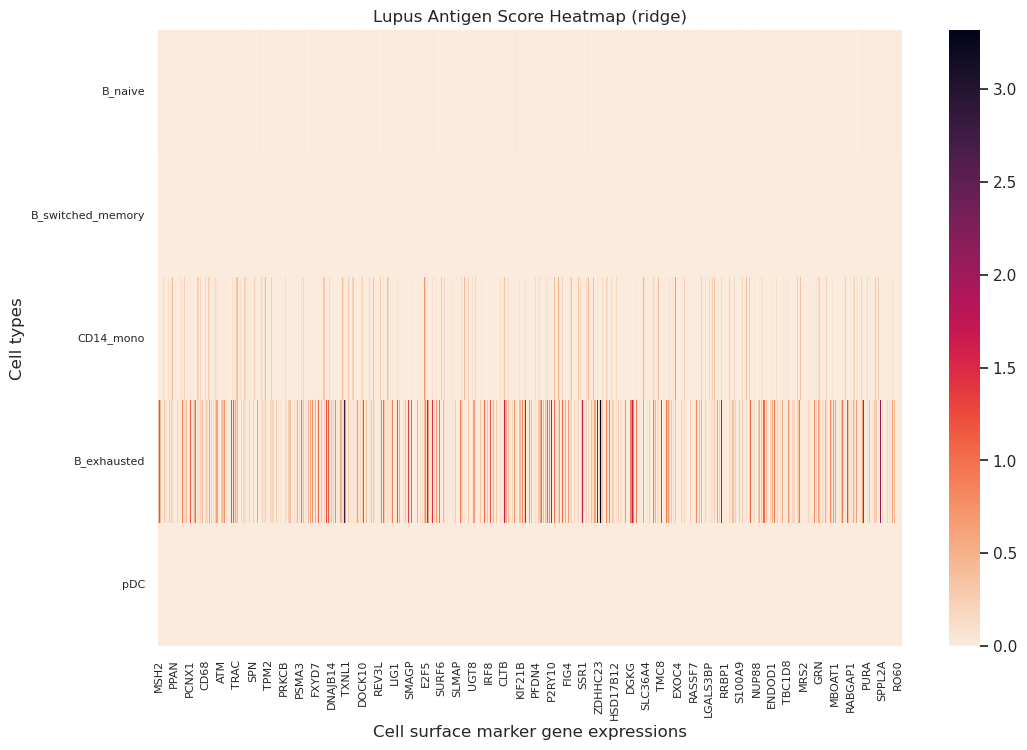

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

averagedMatrix=[]
sums=[]
for cell_t in cellTypes:
    temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    averagedMatrix.append(cellMatrix.loc[cellMatrix['cell_type']==cell_t].median())
    sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
averagedMatrix=pd.DataFrame(averagedMatrix)
averagedMatrix.index=cellTypes
averagedMatrix.clip(0, inplace=True)
sums=sums/sum(sums) # to make "sums" the fraction of the cell type in the total cell population
upregProts_effective=averagedMatrix.loc[:,upregProts].mean(axis=1)
scoreMatrix=abundanceMatrix.mul(upregProts_effective, axis=0) # multiply by upregulated protein presence in each cell type
scoreMatrix=scoreMatrix.mul(sums, axis=0)

sns.set_theme(style="whitegrid", palette="pastel")
fig,ax=plt.subplots(figsize=(12,8))
scoreMatrix=scoreMatrix.dropna(axis=1, how='all')
sns_plot=sns.heatmap(scoreMatrix,ax=ax,cmap='rocket_r')

ax.set_title(f"Lupus Antigen Score Heatmap ({model})")
ax.set(xlabel='Cell surface marker gene expressions', ylabel='Cell types')

sns_plot.tick_params(labelsize=8)
fig.savefig(dataset+f"_heatmap ({model}).png", bbox_inches='tight')

# Targets already used in CAR T-cell therapy
According to Therapeutic Target Database (https://db.idrblab.net/ttd/search/target-car-t)

In [27]:
repurposableTargets = [ # Targets mentioned in Therapeutic Target Database
    "CD80",
    "TNFRSF17",
    "CD22",
    "CD19",
    "NY-ESO-1",
    "CD66e",
    "CD27-L",
    "CLDN18",
    "CD137",
    "CD38",
    "DLL3",
    "EPHA2",
    "EGFR",
    "EGFR vIII",
    "EBV LMP1",
    "HER2",
    "GPRC5D",
    "GCPII",
    "GPC3",
    "PMEL",
    "CD34",
    "ICAM1",
    "IL3RA",
    "CD20",
    "TNFRSF8",
    "MAGEA1",
    "MAGEA4",
    "MSLN",
    "MUC1",
    "CD33",
    "CD371",
    "NCAM1",
    "L1CAM",
    "ROR1",
    "ROR2",
    "MME",
    "KLRK1",
    "PD-L1",
    "PROM1",
    "PSCA",
    "MET",
    "CS1",
    "SDC1",
    "CD7",
    "TRBC1",
    "CD4",
    "TRAIL-R2",
    "EPCAM",
    "KIT"
]

# Summary plots

Top 5 Scores for ['TNFSF13B', 'ITGB2', 'ISG15']:
Cell type: B_exhausted, Surface marker: FCGR2B, Value: 3.3167209
Cell type: B_exhausted, Surface marker: C11orf24, Value: 2.7322146
Cell type: B_exhausted, Surface marker: TP53I11, Value: 2.3111976
Cell type: B_exhausted, Surface marker: CD84, Value: 2.1935224
Cell type: B_exhausted, Surface marker: LAIR1, Value: 2.1623004


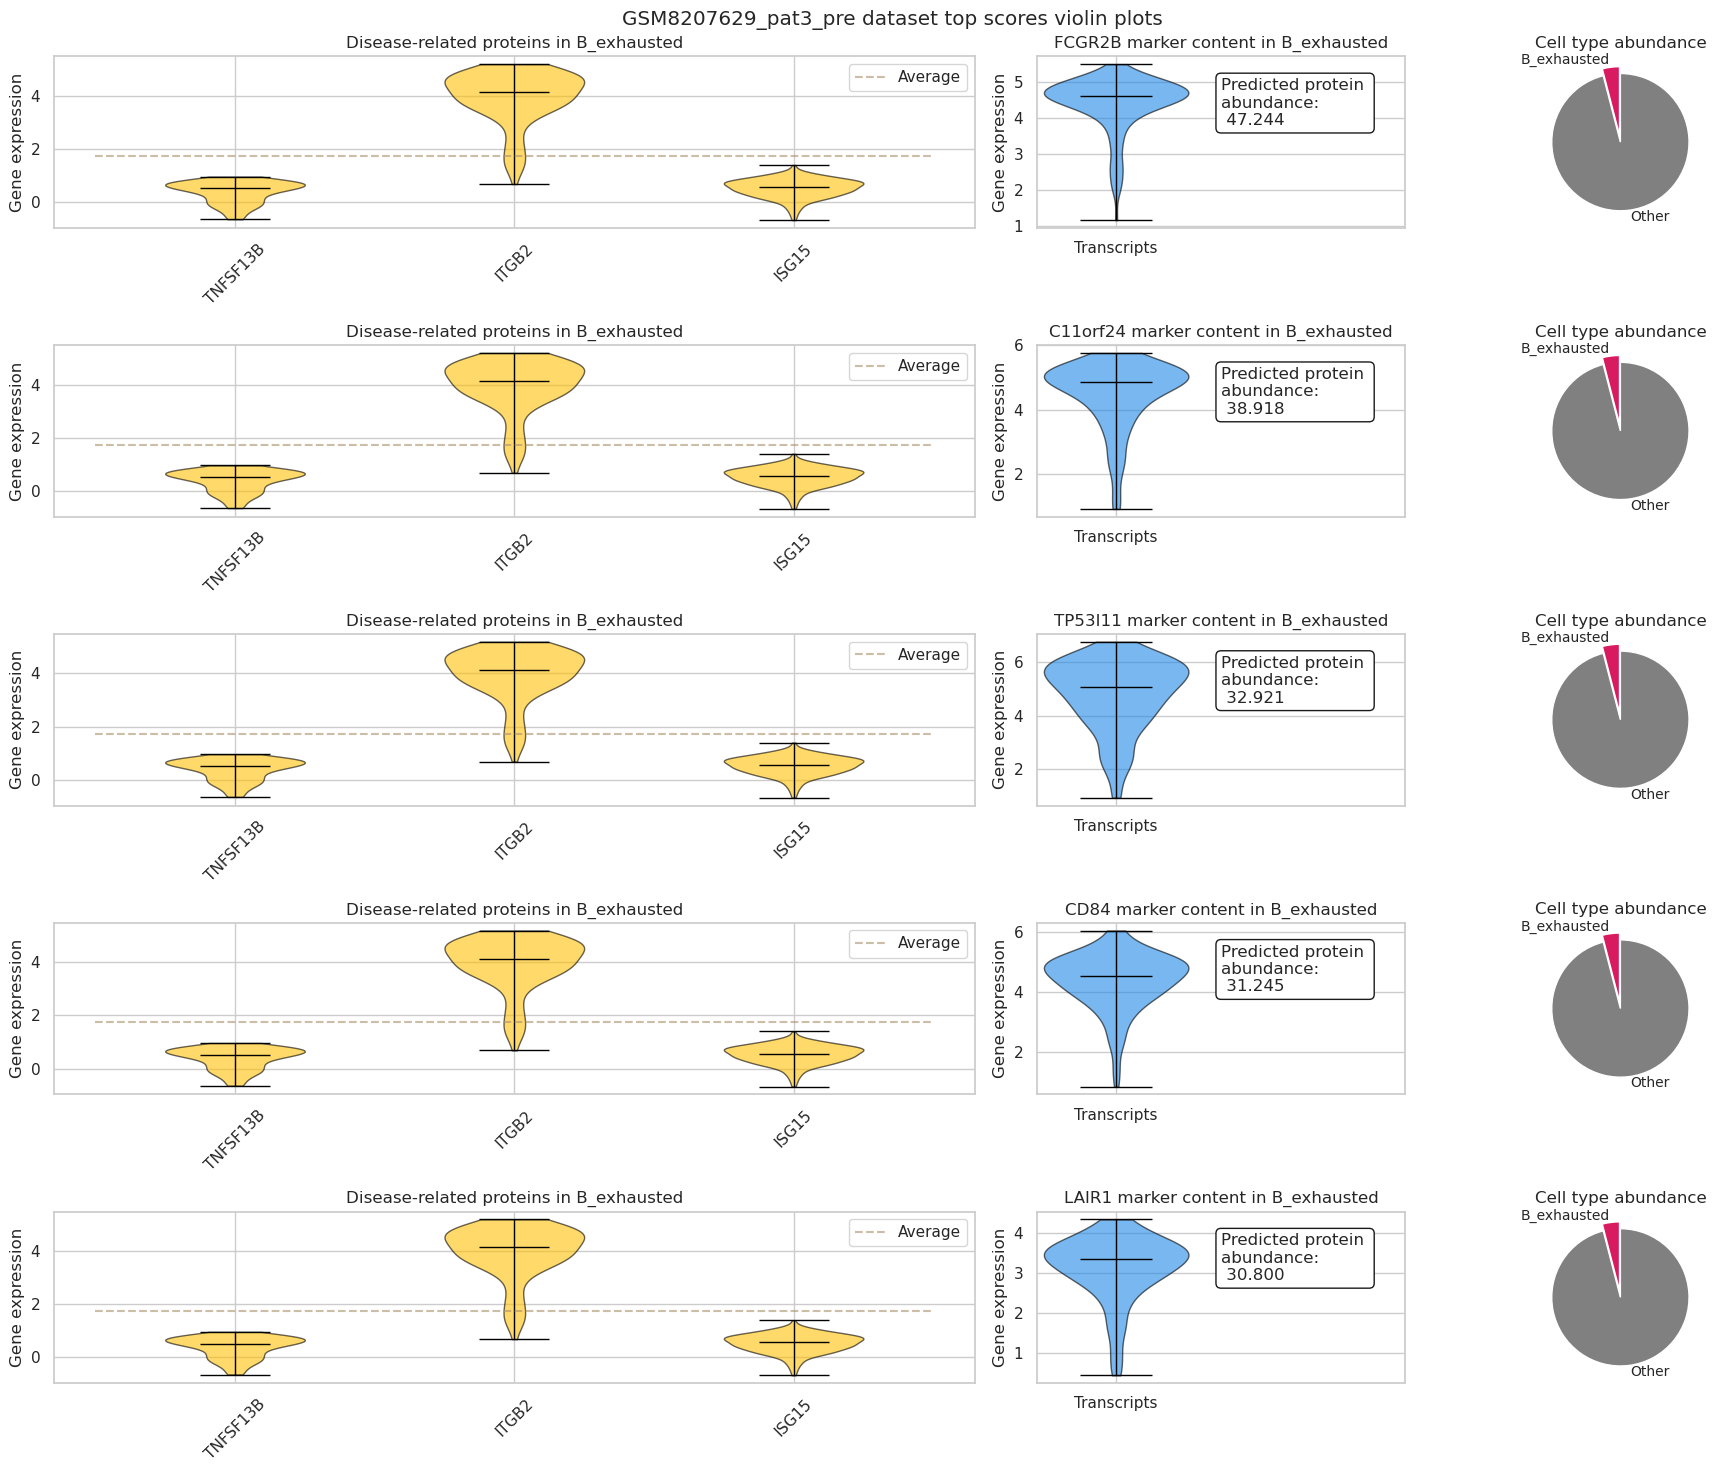

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

only_famous_targets=False
n=5

# Assuming the necessary variables (adata, cellMatrix, cellTypes, surf_markers, etc.) are defined elsewhere

# Get top n scores in averagedMatrix with column and index names
if(only_famous_targets):
    usedMarkers_scoreMatrix=scoreMatrix.loc[:, scoreMatrix.columns.isin(repurposableTargets)].copy()
    top_scores = usedMarkers_scoreMatrix.unstack().sort_values(ascending=False).head(n)
else:
    top_scores = scoreMatrix.unstack().sort_values(ascending=False).head(n)
    
top_info = [(index[1], index[0], value) for index, value in top_scores.items()]

# Display the top n scores with column and index names
print("Top " + str(n) + " Scores for " + str(upregProts) + ":")
fig, axs = plt.subplots(nrows=n, ncols=3, figsize=(18, 3*n), gridspec_kw={'width_ratios': [1*len(upregProts), 1.2,1]})
i = 0

for cell_t, marker, score in top_info:
    if marker in repurposableTargets:
        repurp = "\tTested for cancer"
    else:
        repurp = ""

    # Get the data to be plotted in the violin plot
    violin_data_1 = [cellMatrix.loc[cellMatrix['cell_type'] == cell_t, prot] for prot in upregProts]
    violin_data_2 = cellMatrix.loc[cellMatrix['cell_type'] == cell_t, marker]

    # Plot the combined violin plot for multiple upregProts
    violin_parts_1 = axs[i, 0].violinplot(violin_data_1, showmedians=True, showextrema=True)
    axs[i, 0].set_xticks(np.arange(1, len(upregProts) + 1))
    axs[i, 0].set_xticklabels(upregProts, rotation=45)
    axs[i, 0].set_title("Disease-related proteins in " + cell_t)
    axs[i, 0].set_ylabel("Gene expression")
    
    axs[i, 0].plot([0.5, len(upregProts)+0.5], [averagedMatrix.loc[cell_t, upregProts].mean(), averagedMatrix.loc[cell_t, upregProts].mean()], linestyle='dashed', color='#AB916D', alpha=0.6, label="Average")
    axs[i, 0].legend()
    # Customize violin plot colors
    for j, pc in enumerate(violin_parts_1['bodies']):
        pc.set_facecolor('#FFC107')
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
        vp = violin_parts_1[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Plot the second violin plot
    violin_parts_2 = axs[i, 1].violinplot([violin_data_2], showmedians=True, showextrema=True)
    axs[i, 1].set_xticks([1, 2])
    axs[i, 1].set_xticklabels(["Transcripts", ""])
    axs[i, 1].set_title(marker + " marker content in " + cell_t)
    axs[i, 1].set_ylabel("Gene expression")
    
    axs[i, 1].annotate(f"Predicted protein \nabundance:\n{abundanceMatrix.loc[cell_t, marker]: .3f}", xy=(0.5, 0.6), xycoords=axs[i, 1].transAxes, bbox=dict(boxstyle="round", fc="w", edgecolor='k'))

    for pc in violin_parts_2['bodies']:
        pc.set_facecolor('#1E88E5')
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
        vp = violin_parts_2[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Plot the pie chart
    piechart = axs[i, 2].pie([sums[cellTypes.index(cell_t)], 1 - sums[cellTypes.index(cell_t)]],
                             labels=[cell_t, "Other"], colors=['#D81B60', 'grey'],
                             startangle=90, explode=[0.1, 0],
                             textprops={'size': 'smaller'})
    axs[i, 2].set_title("Cell type abundance")

    print(f"Cell type: {cell_t}, Surface marker: {marker}, Value: {score:.7f}" + repurp)
    i += 1

if(only_famous_targets):
    known_targets_only="_known_targets_only"
    fig.suptitle(dataset + " dataset top scores violin plots (known targets)")
else:
    known_targets_only=""
    fig.suptitle(dataset + " dataset top scores violin plots")
    

plt.tight_layout()
plt.show()

fig.savefig(dataset + "_violin"+known_targets_only+".png", bbox_inches='tight')


# Sensitivity specificity plots

In [29]:
def orgMyPlots(subPlotsCount, columns=3):
    rows=np.ceil(float(subPlotsCount)/columns)
    x_ind=[]
    y_ind=[]
    
    for i in range(subPlotsCount):
        x_ind.append(i%columns)
        y_ind.append(int(np.floor(i/columns)))
    return x_ind, y_ind

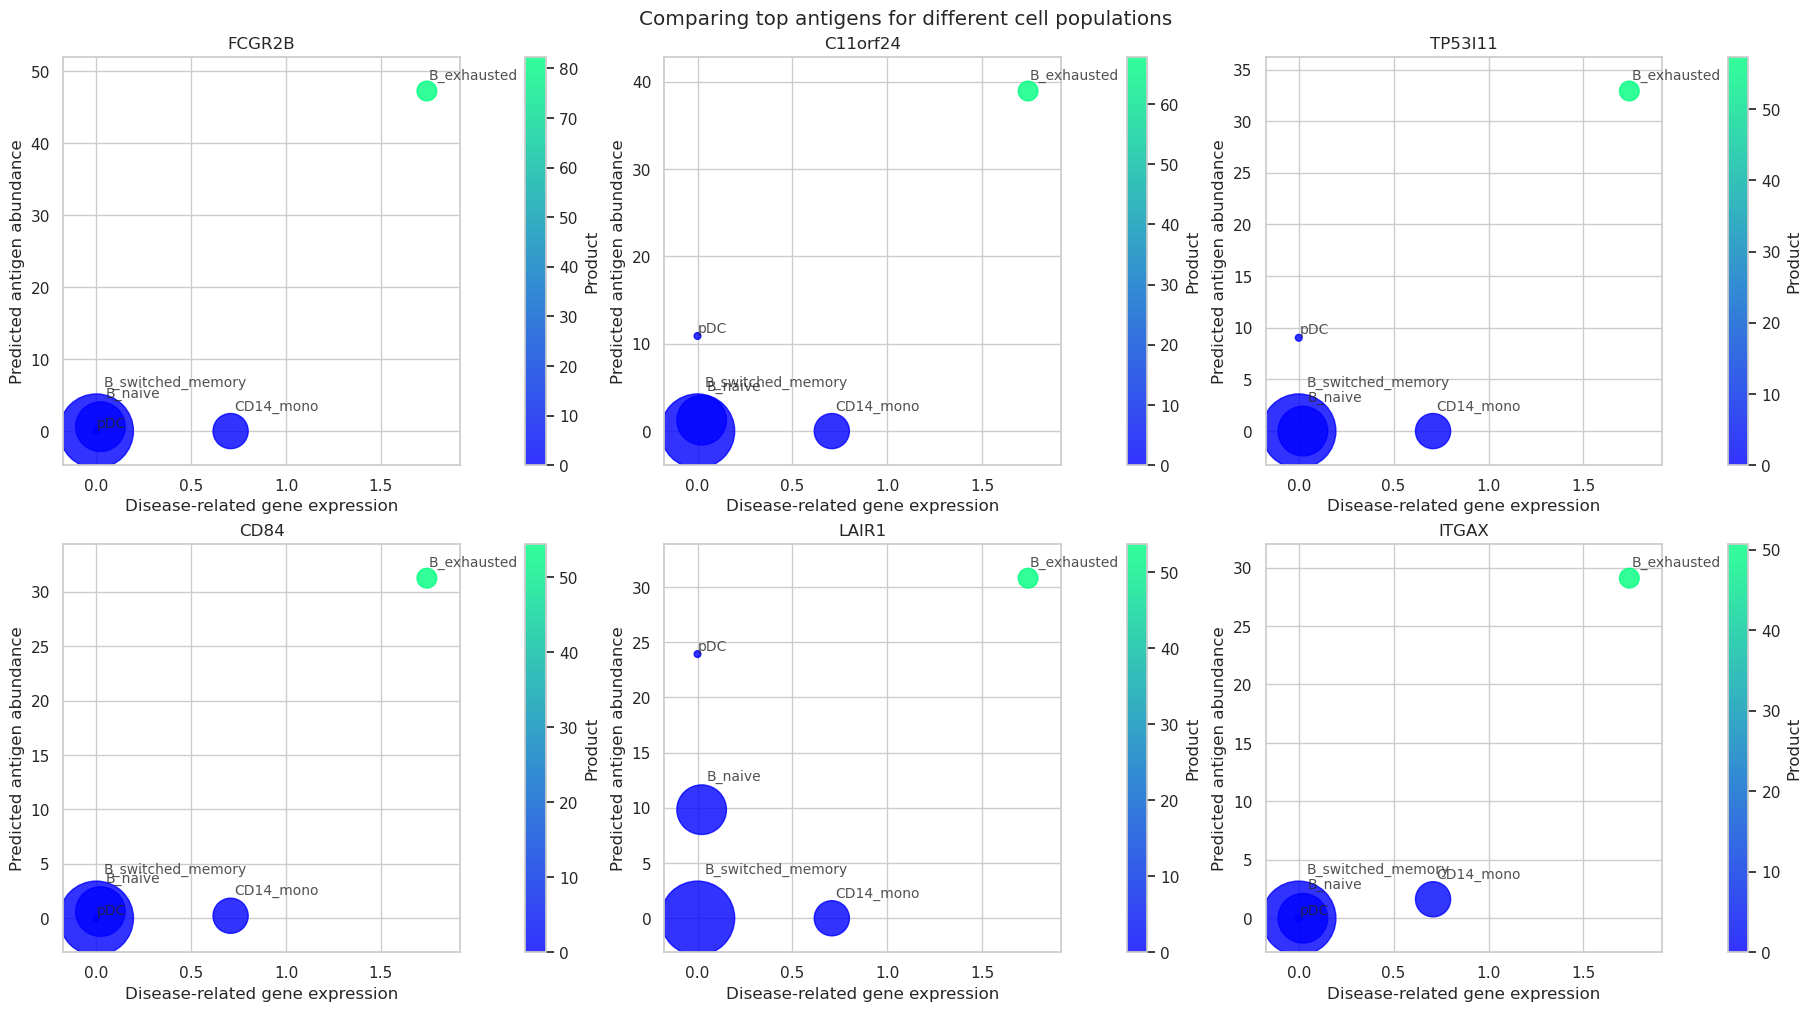

In [30]:
import matplotlib.pyplot as plt
import numpy as np

only_famous_targets=False
n=6

x_ind, y_ind = orgMyPlots(n, 3)
x_ind = [round(i) for i in x_ind]
y_ind = [round(i) for i in y_ind]

ranked_antigens = scoreMatrix.sum(axis=0)
if only_famous_targets:
    ranked_antigens = ranked_antigens.loc[ranked_antigens.index.isin(repurposableTargets)]

ranked_antigens.sort_values(ascending=False, inplace=True)
ranked_antigens = ranked_antigens.head(n)

fig, ax = plt.subplots(int(max(y_ind))+1, int(max(x_ind))+1, figsize=(18,10), layout='constrained')

for i, marker in enumerate(ranked_antigens.index):
    sizes = sums
    x = upregProts_effective
    y = abundanceMatrix[marker]
    c = x * y
    pcm = ax[y_ind[i], x_ind[i]].scatter(x, y, s=sizes*5000, alpha=0.8, cmap='winter', c=c)
    
    # Calculate padding
    x_pad = (x.max() - x.min()) * 0.1
    y_pad = (y.max() - y.min()) * 0.1
    
    # Set limits with padding
    ax[y_ind[i], x_ind[i]].set_xlim(x.min() - x_pad, x.max() + x_pad)
    ax[y_ind[i], x_ind[i]].set_ylim(y.min() - y_pad, y.max() + y_pad)
    
    for xi, yi, size, text in zip(x, y, sizes, y.index):
        ax[y_ind[i], x_ind[i]].annotate(text,
                    xy=(xi, yi), xycoords='data',
                    xytext=(0.1 * np.sqrt(size * 5000), 0.6 * np.sqrt(size * 5000)), 
                    textcoords='offset points',
                    alpha=0.8, size=10)
    
    ax[y_ind[i], x_ind[i]].set_xlabel("Disease-related gene expression")
    ax[y_ind[i], x_ind[i]].set_ylabel("Predicted antigen abundance")
    ax[y_ind[i], x_ind[i]].set_title(marker)
    
    # Add a colorbar for each subplot
    cbar = fig.colorbar(pcm, ax=ax[y_ind[i], x_ind[i]], pad=0.02, orientation='vertical')
    cbar.set_label("Product")

fig.suptitle("Comparing top antigens for different cell populations")

fig.savefig("Sensitivity_and_Specificity_Antigen_Comparison_Plot.png", bbox_inches='tight')
fig.show()


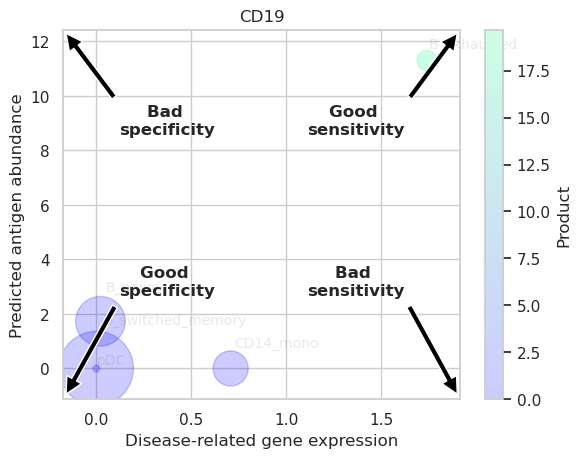

In [31]:
import matplotlib.pyplot as plt
import numpy as np

only_famous_targets = True
n = 1

ranked_antigens = scoreMatrix.sum(axis=0)
if only_famous_targets:
    ranked_antigens = ranked_antigens.loc[ranked_antigens.index.isin(repurposableTargets)]

ranked_antigens.sort_values(ascending=False, inplace=True)
ranked_antigens = ranked_antigens.head(n)
   
for marker in ranked_antigens.index:
    sizes = sums
    x = upregProts_effective
    y = abundanceMatrix[marker]
    
    plt.scatter(x, y, s=sizes * 5000, alpha=0.2, cmap='winter', c=x * y)
    
    # Calculate padding
    x_pad = (x.max() - x.min()) * 0.1
    y_pad = (y.max() - y.min()) * 0.1
    
    # Set limits with padding
    plt.xlim(x.min() - x_pad, x.max() + x_pad)
    plt.ylim(y.min() - y_pad, y.max() + y_pad)
    
    # Annotate each point
    for xi, yi, size, text in zip(x, y, sizes, y.index):
        plt.annotate(text,
                     xy=(xi, yi), xycoords='data',
                     xytext=(0.1 * np.sqrt(size * 5000), 0.6 * np.sqrt(size * 5000)), 
                     textcoords='offset points',
                     alpha=0.1, size=10)

    # Add arrows to the corners
    corners = {
        "Bad \nspecificity": (x.min() - x_pad, y.max() + y_pad),
        "Good \nsensitivity": (x.max() + x_pad, y.max() + y_pad),
        "Good \nspecificity": (x.min() - x_pad, y.min() - y_pad),
        "Bad \nsensitivity": (x.max() + x_pad, y.min() - y_pad)
    }
    
    for (corner_name, (cx, cy)) in corners.items():
        if(cx)<=0:
            x_offset=75
        else:
            x_offset=-75
        if(cy)<=0:
            y_offset=75
        else:
            y_offset=-75
        plt.annotate(corner_name,
                     xy=(cx, cy), xycoords='data',
                     xytext=(x_offset, y_offset), textcoords='offset points',
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=12, weight='bold', ha='center')
    
    plt.xlabel("Disease-related gene expression")
    plt.ylabel("Predicted antigen abundance")
    plt.title(marker)
    plt.colorbar(label="Product")
    
    plt.savefig("Sensitivity_and_Specificity_Plot.png", bbox_inches='tight')
    plt.show()